In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [4]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Tue Aug 02 00:31:03 +0000 2022',
 'id': 1554263471298068480,
 'id_str': '1554263471298068480',
 'full_text': 'In this post, we have added a facial identity-based authentication user interface to show a complete end-to-end identity verification solution. \n\n#AWS #AWSBlog #Serverless #APIGateway #StepFunction #Rekognition #Cloud #CloudComputing\n https://t.co/FfWEPQcb9a https://t.co/qbaMxmLaMx',
 'truncated': False,
 'display_text_range': [0, 258],
 'entities': {'hashtags': [{'text': 'AWS', 'indices': [146, 150]},
   {'text': 'AWSBlog', 'indices': [151, 159]},
   {'text': 'Serverless', 'indices': [160, 171]},
   {'text': 'APIGateway', 'indices': [172, 183]},
   {'text': 'StepFunction', 'indices': [184, 197]},
   {'text': 'Rekognition', 'indices': [198, 210]},
   {'text': 'Cloud', 'indices': [211, 217]},
   {'text': 'CloudComputing', 'indices': [218, 233]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/FfWEPQcb9a',
    'expanded_url': 'https://

In [5]:
data[0]['full_text']

'In this post, we have added a facial identity-based authentication user interface to show a complete end-to-end identity verification solution. \n\n#AWS #AWSBlog #Serverless #APIGateway #StepFunction #Rekognition #Cloud #CloudComputing\n https://t.co/FfWEPQcb9a https://t.co/qbaMxmLaMx'

In [6]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,"In this post, we have added a facial identity-..."
1,If k-fold cross-validation is so important why...
2,Artificial Intelligence will kill us all given...
3,"GitHub Trending Archive, 31 Jul 2022, All. Ten..."
4,Many organizations use #data to make business ...
...,...
1995,@realDailyWire Air Force Testing Drones And Ar...
1996,Ran prompts on MidJourney and man Artificial I...
1997,https://t.co/KxlFQBYXsn\n\nDeep learning forms...
1998,"""The company that works to connect startups, c..."


In [7]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,"In this post, we have added a facial identity-...",1,0,Ana_La_Rana
1,If k-fold cross-validation is so important why...,0,0,TimothyKassis
2,Artificial Intelligence will kill us all given...,0,0,IAMEARLY2
3,"GitHub Trending Archive, 31 Jul 2022, All. Ten...",0,0,motakasoft
4,Many organizations use #data to make business ...,0,0,OmniBSolutions
...,...,...,...,...
1995,@realDailyWire Air Force Testing Drones And Ar...,0,0,Huma_Non
1996,Ran prompts on MidJourney and man Artificial I...,0,1,KGDrayken
1997,https://t.co/KxlFQBYXsn\n\nDeep learning forms...,0,0,luisferfranco
1998,"""The company that works to connect startups, c...",1,1,BenefitsMind


In [8]:
# text cleaning function: see prior class modules
stop_words = stopwords.words('english')
artifacts = ['ai', 'ml', 'machinelearning', 'artificial', 'intelligence','artificialintelligence',
             'machine', 'learning', 'deep', 'deeplearning', 'dl', 'via', 'use', 'using', 'one']
stop_words.extend(artifacts)

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [9]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,"In this post, we have added a facial identity-...",1,0,Ana_La_Rana,post added facial authentication user interfac...
1,If k-fold cross-validation is so important why...,0,0,TimothyKassis,important practitioners taking seriously model...
2,Artificial Intelligence will kill us all given...,0,0,IAMEARLY2,kill us given chance general never created des...
3,"GitHub Trending Archive, 31 Jul 2022, All. Ten...",0,0,motakasoft,github trending archive 31 jul 2022
4,Many organizations use #data to make business ...,0,0,OmniBSolutions,many organizations data make business decision...
...,...,...,...,...,...
1995,@realDailyWire Air Force Testing Drones And Ar...,0,0,Huma_Non,realdailywire air force testing drones combat ...
1996,Ran prompts on MidJourney and man Artificial I...,0,1,KGDrayken,ran prompts midjourney man come long way
1997,https://t.co/KxlFQBYXsn\n\nDeep learning forms...,0,0,luisferfranco,forms backbone modern day learn important aspe...
1998,"""The company that works to connect startups, c...",1,1,BenefitsMind,company works connect startups corporations vc...


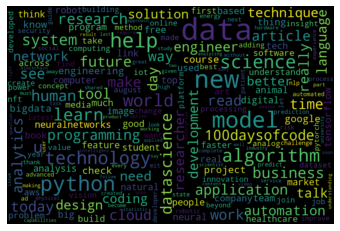

In [10]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_tweets['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [11]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)

{'post': 6,
 'user': 15,
 'show': 8,
 'complete': 9,
 'verification': 3,
 'solution': 46,
 'aws': 22,
 'cloud': 33,
 'cloudcomputing': 4,
 'important': 17,
 'practitioners': 2,
 'taking': 2,
 'seriously': 2,
 'compute': 3,
 'longer': 4,
 'issue': 15,
 'kill': 1,
 'chance': 2,
 'general': 11,
 'never': 10,
 'created': 11,
 'destroyed': 3,
 'github': 3,
 'trending': 2,
 'archive': 1,
 'jul': 1,
 'many': 19,
 'data': 134,
 'make': 40,
 'business': 54,
 'alone': 5,
 'enough': 13,
 'drive': 5,
 'positive': 5,
 'analytics': 17,
 'statistical': 8,
 'turn': 7,
 'meaningful': 3,
 'see': 55,
 'mahesh': 1,
 'saptharishi': 1,
 'chief': 3,
 'technology': 96,
 'executive': 1,
 'president': 4,
 'say': 18,
 'humancentereddesign': 1,
 'fortune': 2,
 'article': 19,
 'innovation': 23,
 'watch': 3,
 'ceo': 1,
 'august': 4,
 'overfitting': 2,
 'adversarially': 1,
 'robust': 5,
 'callistothegame': 1,
 'powerful': 10,
 'station': 2,
 'help': 28,
 'survive': 5,
 'final': 9,
 'fight': 7,
 'find': 27,
 'game': 

In [12]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
post,6
user,15
show,8
complete,9
verification,3
...,...
aewdynamite khloe,3
khloe rhobh,3
something fantasy,3


<AxesSubplot:xlabel='keyword'>

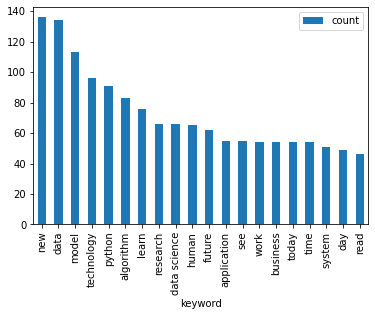

In [13]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

In [14]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_tweets['text_clean']])

In [15]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [16]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('post', 'added'), 3),
 (('added', 'facial'), 3),
 (('facial', 'authentication'), 3),
 (('authentication', 'user'), 3),
 (('user', 'interface'), 3),
 (('interface', 'show'), 3),
 (('show', 'complete'), 3),
 (('complete', 'identity'), 3),
 (('identity', 'verification'), 3),
 (('verification', 'solution'), 3),
 (('solution', 'aws'), 3),
 (('aws', 'awsblog'), 3),
 (('awsblog', 'serverless'), 3),
 (('serverless', 'apigateway'), 3),
 (('apigateway', 'stepfunction'), 3),
 (('stepfunction', 'rekognition'), 3),
 (('rekognition', 'cloud'), 3),
 (('cloud', 'cloudcomputing'), 3),
 (('models', 'models'), 4),
 (('business', 'insights'), 3),
 (('pleasure', 'invite'), 6),
 (('invite', 'watch'), 6),
 (('watch', '1st'), 6),
 (('1st', 'interview'), 6),
 (('interview', 'dnbctv'), 6),
 (('dnbctv', 'ceo'), 6),
 (('ceo', 'founder'), 7),
 (('founder', 'ifgict'), 6),
 (('ifgict', 'latam'), 6),
 (('latam', 'officer'), 6),
 (('officer', 'monday'), 6),
 (('monday', 'august'), 6),
 (('august', '09'), 6),
 (('09

In [17]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
data science,66
neural networks,29
talk animals,26
natural language,23
help us,22
...,...
powered audiobook,3
technology made,3
nlp python,3


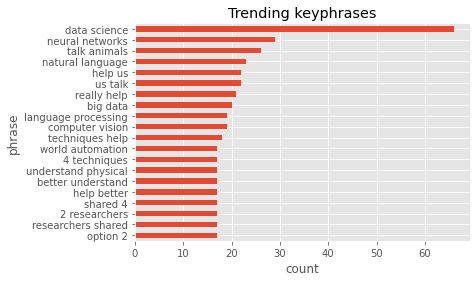

In [18]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()

In [19]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,"In this post, we have added a facial identity-...",1,0,Ana_La_Rana,post added facial authentication user interfac...,0.050000,0.200000
1,If k-fold cross-validation is so important why...,0,0,TimothyKassis,important practitioners taking seriously model...,0.033333,0.833333
2,Artificial Intelligence will kill us all given...,0,0,IAMEARLY2,kill us given chance general never created des...,0.050000,0.500000
3,"GitHub Trending Archive, 31 Jul 2022, All. Ten...",0,0,motakasoft,github trending archive 31 jul 2022,0.000000,0.000000
4,Many organizations use #data to make business ...,0,0,OmniBSolutions,many organizations data make business decision...,0.306818,0.511364
...,...,...,...,...,...,...,...
1995,@realDailyWire Air Force Testing Drones And Ar...,0,0,Huma_Non,realdailywire air force testing drones combat ...,0.000000,0.000000
1996,Ran prompts on MidJourney and man Artificial I...,0,1,KGDrayken,ran prompts midjourney man come long way,-0.050000,0.400000
1997,https://t.co/KxlFQBYXsn\n\nDeep learning forms...,0,0,luisferfranco,forms backbone modern day learn important aspe...,0.300000,0.650000
1998,"""The company that works to connect startups, c...",1,1,BenefitsMind,company works connect startups corporations vc...,0.000000,0.000000


In [20]:
# example: tweet subset mentioning a given keyword
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("technology")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
5,"See what Mahesh Saptharishi, chief technology ...",0,0,MotoSolutionsAP,see mahesh saptharishi chief technology office...,0.000000,0.000000
18,"In 2022, artificial intelligence will have pro...",0,0,Eseoffishal,2022 progressed far enough become revolutionar...,0.050000,0.750000
29,Short Interest in Global X Artificial Intellig...,0,0,AINewsFeed,short interest global x technology etf nasdaq ...,0.000000,0.150000
32,"""While TikTok does use artificial intelligence...",0,3,dmonett,tiktok help review content technology notoriou...,-0.400000,0.600000
49,Never been able to tell pandas apart? Don't fe...,1,1,progressntwrk,never able tell pandas apart feel bad neither ...,-0.316667,0.430556
...,...,...,...,...,...,...,...
1948,Government has prepared a roadmap to further d...,0,2,pro_defence,government prepared roadmap develop capabiliti...,0.000000,0.000000
1949,Before you sign on to begin using the latest a...,1,1,Calsoft_Data,sign begin latest greatest technology tools bu...,0.600000,0.947222
1970,Police van using artificial intelligence to de...,1,0,RoboticsAINews,police van detect dangerous driving habits goe...,-0.600000,0.900000
1978,"No code, no problem-we try to beat an AI at it...",1,1,ArtIntel_b,code try beat game new ars technica past year ...,-0.171212,0.368182


In [21]:
# function to compute average sentiment of tweets mentioning a given word or phrase
def sentiment_analysis(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [26]:
# highest sentiment tweets
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
498,hagning out with my best friends machine learn...,0,5,AMYBESTEVEZ,hagning best friends audio engineering today,1.00,0.30
175,Angela was the best Artificial Intelligence I ...,0,0,benjaminhokma,angela best ever known,1.00,0.30
958,Superb commentary on artificial intelligence f...,0,1,Lone_Horse,superb commentary survivor,1.00,1.00
1626,Best 3 Tips to Get Returns on AI #Investments ...,2,0,TheNextTech2018,best 3 tips get returns investments tipstogetr...,1.00,0.30
1463,Best Automation agency in San Jose-Artificial ...,0,0,mishtia10,best automation agency san company san jose,1.00,0.30
451,A machine learning algorithm doesn't wait for ...,1,1,alexcancode,algorithm wait perfect moment start keeps goin...,1.00,1.00
90,"FDA outlines best practices for health#careAI,...",0,1,FerrumHealth,fda outlines best practices health careai alon...,1.00,0.30
1607,A wonderful thread about applied machine learn...,1,1,officialKrishD,wonderful thread applied clinical notes hammaa...,1.00,0.65
397,@charleswangb @MelMitchell1 I don't think eith...,0,1,IntuitMachine,charleswangb melmitchell1 think either deacon ...,1.00,0.30
942,"Another method\nLet's say, A has traveled to B...",0,0,ChrisAfrik,another method let say traveled borno despite ...,0.85,1.00


In [27]:
# Lowest sentiment tweets
df_tweets.sort_values(by='polarity', ascending=True).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1911,Brilliantly insane machine learning hacks http...,1,0,genericgranola,brilliantly insane hacks datascience trending ...,-1.000000,1.000000
1947,https://t.co/31btZhUyoS\nArtificial Intelligen...,0,0,TechFervor,technology identify sick chicks poultry industry,-0.714286,0.857143
364,@hugefuckshitter @HappyTime1066 @SinNominee @m...,0,0,_Hologramghost,hugefuckshitter happytime1066 sinnominee mytho...,-0.700000,0.666667
1172,A high-tech #AI police van which can automatic...,2,9,SwissCognitive,police van automatically detect dangerous driv...,-0.600000,0.900000
1486,I've been afraid of artificial intelligence si...,0,0,Dheafskrheatn,afraid since day played detroit elonmusk,-0.600000,0.900000
1970,Police van using artificial intelligence to de...,1,0,RoboticsAINews,police van detect dangerous driving habits goe...,-0.600000,0.900000
1702,"@BlackDave Working on it Dave, as you know \n\...",0,2,KGeorgee,blackdave working dave know bloody close avata...,-0.600000,0.683333
1200,Scientists: Artificial intelligence will help ...,1,0,PetrBrzek,scientists help humans people chicken nuggets ...,-0.600000,0.950000
1740,In about a week I’ll know more about machine l...,0,0,JesseNeon,week ill know python people planet remember wa...,-0.550000,0.900000
1038,@Catfish_Man @nelhage Like most of the example...,0,3,glyph,nelhage like examples really hate people terri...,-0.503571,0.858929


In [22]:
# Prepare the dataset to analyze keyword sentiment
df_top_keywords = df_kwords.sort_values(by='count', ascending=False).head(10)

# Change the index of the dataframe to a column called 'keyword'
df_top_keywords.reset_index(inplace=True)
df_top_keywords = df_top_keywords.rename(columns = {'index':'keyword'})

df_top_keywords

,keyword,count
0,new,136
1,data,134
2,model,113
3,technology,96
4,python,91
5,algorithm,83
6,learn,76
7,research,66
8,data science,66
9,human,65


In [23]:
# keyword sentiment comparison
df_top_keywords['average_sentiment'] = df_top_keywords['keyword'].apply(sentiment_analysis)
df_top_keywords

,keyword,count,average_sentiment
0,new,136,0.132328
1,data,134,0.122625
2,model,113,0.079065
3,technology,96,0.098449
4,python,91,0.121349
5,algorithm,83,0.113863
6,learn,76,0.097699
7,research,66,0.124135
8,data science,66,0.155345
9,human,65,0.067859


In [24]:
# Prepare the dataset to analyze keyphrase sentiment
df_top_keyphrases = df_freq.sort_values(by='count', ascending=False).head(10)

# Change the index of the dataframe to a column called 'keyphrase'
df_top_keyphrases.reset_index(inplace=True)
df_top_keyphrases = df_top_keyphrases.rename(columns = {'index':'keyphrase'})

df_top_keyphrases

,keyphrase,count
0,data science,66
1,neural networks,29
2,talk animals,26
3,natural language,23
4,help us,22
5,us talk,22
6,really help,21
7,big data,20
8,computer vision,19
9,language processing,19


In [25]:
# keyphrase sentiment comparison
df_top_keyphrases['average_sentiment'] = df_top_keyphrases['keyphrase'].apply(sentiment_analysis)
df_top_keyphrases

,keyphrase,count,average_sentiment
0,data science,66,0.155345
1,neural networks,29,0.129315
2,talk animals,26,0.160315
3,natural language,23,0.153906
4,help us,22,0.187676
5,us talk,22,0.187676
6,really help,21,0.197060
7,big data,20,0.051915
8,computer vision,19,0.035732
9,language processing,19,0.133293


In [28]:
# most retweeted content
df_most_retweeted = df_tweets.sort_values(by='retweets', ascending=False)
df_most_retweeted.iloc[0:21, :]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1661,Palantir is proud to announce we’ve expanded o...,42,253,PalantirTech,palantir proud announce weve expanded work arm...,0.400000,0.500000
829,BREAKING: NYPD ordered to handover documents d...,31,63,amnestyusa,breaking nypd ordered handover documents detai...,-0.055556,0.211111
1657,A postdoc position is available. Pls shoot me ...,29,59,weijie444,postdoc position available pls shoot email int...,0.170000,0.260000
25,#TheGreatFlood is a science fiction disaster b...,29,83,kimdamipics,thegreatflood science fiction disaster blockbu...,0.266667,0.294444
310,Great 8 Python Libraries for Machine Learning...,28,20,gp_pulipaka,great 8 python libraries bigdata analytics dat...,0.800000,0.750000
675,Deep Learning for Vision Systems \n\nLink - ht...,28,13,rasangarocks,vision systems link python computervision 100d...,0.000000,0.000000
294,Bayesian Foundation in 8 Parts. #BigData #Ana...,28,17,gp_pulipaka,bayesian foundation 8 parts bigdata analytics ...,0.000000,0.000000
1230,De novo RNA tertiary structure prediction at n...,23,97,OlivierDuss,de novo rna tertiary structure prediction reso...,0.387500,0.887500
1766,1996 Gradient Based Processes in Deep Learning...,22,13,gp_pulipaka,1996 gradient based processes averconferences ...,0.000000,0.000000
166,Top Machine Learning Books Made Easy. #BigData...,22,11,gp_pulipaka,top books made easy bigdata analytics datascie...,0.466667,0.666667


In [29]:
# users producing most retweeted content
user_retweets = df_tweets.groupby('user')['retweets'].sum()
user_retweets = user_retweets.sort_values(ascending=False)

user_retweets.head(20)

user
gp_pulipaka        130
corpus_news        101
rasangarocks        70
byLilyV             43
PalantirTech        42
amnestyusa          31
AINewsFeed          31
kimdamipics         29
weijie444           29
ipfconline1         25
OlivierDuss         23
DcEnquirer          21
joshuastarmer       21
TheSequenceAI       20
Datascience__       19
fimiletoks          18
Rajaina14020801     16
94KINGDAMI          16
Nature              15
BlackWomenInAI      15
Name: retweets, dtype: int64